In [58]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt


In [59]:

import torch.nn as nn
import torch.nn.functional as F

# Define MLP model class
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create model instance
model = MLP()


In [60]:
# --- 2. Load Custom Digits for Training ---
def ProjectDataLoader(path='./handpicked', transform=None):
    images, labels = [], []
    for filename in os.listdir(path):
        if filename.endswith('.png'):
            label = int(filename.split('-')[0])
            img_path = os.path.join(path, filename)
            img = Image.open(img_path).convert('L').resize((28, 28))
            if transform:
                img = transform(img)
            else:
                img = transforms.ToTensor()(img)
            images.append(img)
            labels.append(label)
    return torch.stack(images), torch.tensor(labels).long().squeeze()

custom_batch, custom_labels_tensor = ProjectDataLoader('./handpicked')
custom_dataset = TensorDataset(custom_batch, custom_labels_tensor)
trainloader = DataLoader(custom_dataset, batch_size=16, shuffle=True)

In [61]:

# Load MNIST with no transform and no normalization
transform = transforms.ToTensor()

trainset = datasets.MNIST(root='./MNIST_data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./MNIST_data', train=False, download=True, transform=transform)


print("MNIST datasets loaded with NO transform and NO normalization.")


MNIST datasets loaded with NO transform and NO normalization.


In [62]:
def pil_collate(batch):
    images, labels = zip(*batch)
    return list(images), torch.tensor(labels)

testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, collate_fn=pil_collate)



In [63]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [64]:

correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        # Manually convert batch of PIL images to tensors
        img_batch = []
        for img in images:
            tensor_img = torch.tensor(np.array(img), dtype=torch.float32).unsqueeze(0) / 255.0  # shape [1,28,28]
            img_batch.append(tensor_img)
        img_batch = torch.stack(img_batch)  # shape [batch, 1, 28, 28]

        outputs = model(img_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 8.92%


Test Accuracy: 8.92%


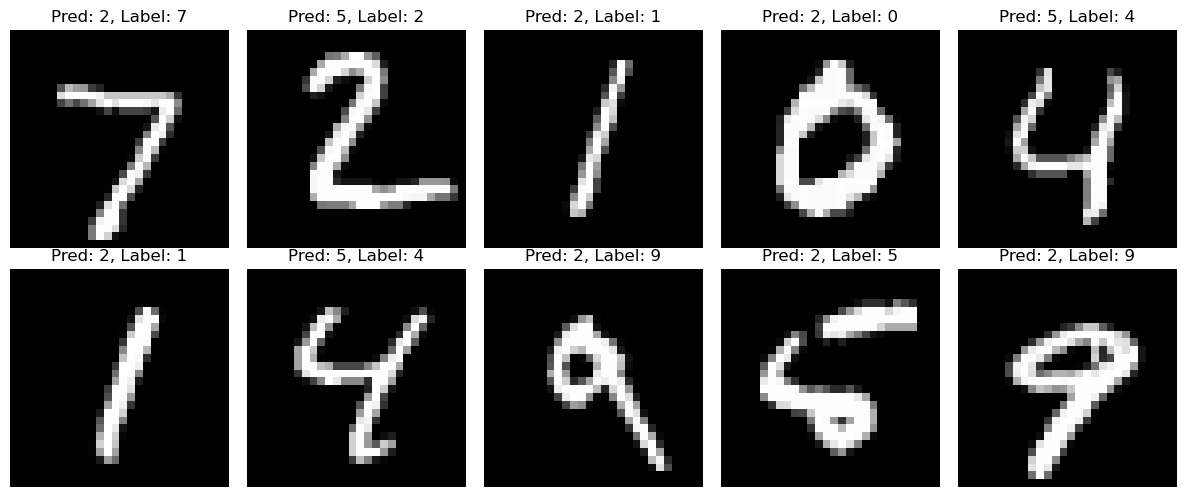

In [65]:

correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        # Manually convert batch of PIL images to tensors
        img_batch = []
        for img in images:
            tensor_img = torch.tensor(np.array(img), dtype=torch.float32).unsqueeze(0) / 255.0  # shape [1,28,28]
            img_batch.append(tensor_img)
        img_batch = torch.stack(img_batch)  # shape [batch, 1, 28, 28]

        outputs = model(img_batch)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

# --- 9. Visualize a Few Test Predictions ---
def show_mnist_predictions(model, testloader, num_images=10):
    model.eval()

    images, labels, preds = [], [], []

    with torch.no_grad():
        for batch in testloader:
            x, y = batch
            x = torch.stack(x).to(next(model.parameters()).device)
            outputs = model(x)
            _, predicted = torch.max(outputs, 1)

            images.extend(x.cpu())
            labels.extend(y)
            preds.extend(predicted.cpu())

            if len(images) >= num_images:
                break

    # Plot first num_images
    fig, axs = plt.subplots(2, 5, figsize=(12, 5))
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i].squeeze(0), cmap='gray')  # <-- fix is here
        ax.set_title(f"Pred: {preds[i].item()}, Label: {labels[i].item()}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_mnist_predictions(model, testloader)
